In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from datetime import datetime 
from pandas import Series 
            
%matplotlib inline 
sns.set(color_codes=True)

plt.style.use('fivethirtyeight')

# Data Importing and Exploration

## Importing data for ASIANPAINT company stock statistics

In [2]:
url = 'https://drive.google.com/file/d/1nM8Lc7El4dr9eq-iMkhiw1z3ZnCQOejv/view?usp=sharing'
# path to data
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [3]:
df = pd.read_csv(path)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.00,370.00,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.00,375.00,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.00,371.50,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.90,374.50,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.00,370.00,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458


## Performing Exploratory Analysis

In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1247.000952,1247.683952,1264.625349,1230.900697,1247.317132,1247.410903,1247.799926,5.096721e+05,6.942919e+13,41346.011401,2.751281e+05,0.625572
std,1074.399506,1074.025577,1087.238871,1062.629409,1074.432667,1074.476439,1075.057438,8.535993e+05,1.443973e+14,36435.449733,4.157465e+05,0.187597
min,210.750000,210.000000,215.750000,204.000000,210.600000,210.750000,212.220000,2.500000e+01,1.278415e+09,70.000000,2.500000e+01,0.076800
25%,415.737500,415.000000,424.950000,410.000000,416.000000,416.262500,415.692500,1.370750e+04,7.538133e+11,16264.750000,1.262200e+04,0.486200
50%,889.375000,890.000000,903.975000,878.075000,890.000000,889.475000,888.350000,5.713600e+04,1.109437e+13,32402.500000,5.273800e+04,0.616100
75%,1599.037500,1599.800000,1629.675000,1573.037500,1602.500000,1600.762500,1600.982500,8.077905e+05,7.761479e+13,54727.500000,4.383750e+05,0.765500
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.100000,5213.100000,5175.790000,1.154594e+07,2.216650e+15,351347.000000,7.938427e+06,1.000000


Things to note
- There is a large range for most variables, considering this is only one stock ticker. This is due to the large time range.
- The mean of most of the price metrics is around 1250 and SD is around 1075, so the stock price must have stayed around this price for a while. 
- We need to look for missing values in these columns

In [5]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

We can see alot of missing values for "Trades" column and some for the deliverable columns. Likely trades will be a significant predictor for our model so we will need to test if deleting the rows with no trade value will affect test error. Deliverables will likely have no affect on prediction accuracy.

We can create a dataframe with NAs and without NAs for seperate testing to deal with these values. However, it will be hard use common substitutes for NA values as the range of trades is extremely large. This means we will need another substitute. 


In [6]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

We can see that our date column is an object type instead of a datetime. We will need to handle this in order to do time-series analysis. 
As of now, we are just working with the ASIANPAINT stock, so we may be able to drop this column. This is the same for the series column, since all of the stocks we will be looking at are EQ series. 



In [7]:
df = df.drop(columns = "Series")
df = df.drop(columns = "Symbol")
df = df.drop(columns = "%Deliverble")
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
0,2000-01-03,361.20,370.0,390.00,370.00,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN
1,2000-01-04,381.65,380.0,392.00,375.00,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN
2,2000-01-05,385.55,371.5,390.00,371.50,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN
3,2000-01-06,383.00,384.9,384.90,374.50,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN
4,2000-01-07,377.50,376.0,390.00,370.00,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0
5302,2021-04-27,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0
5303,2021-04-28,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0
5304,2021-04-29,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0


In [8]:
df.Date = pd.to_datetime(df.Date)
saturdays = df[df.Date.dt.dayofweek == 5]  # 20 saturday values
sundays = df[df.Date.dt.dayofweek == 6]  # 4 sunday values

# Deleting weekend values from df
weekends = pd.concat([saturdays, sundays])
df = pd.concat([df, weekends]).drop_duplicates(keep=False)
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
0,2000-01-03,361.20,370.0,390.00,370.00,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN
1,2000-01-04,381.65,380.0,392.00,375.00,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN
2,2000-01-05,385.55,371.5,390.00,371.50,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN
3,2000-01-06,383.00,384.9,384.90,374.50,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN
4,2000-01-07,377.50,376.0,390.00,370.00,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0
5302,2021-04-27,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0
5303,2021-04-28,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0
5304,2021-04-29,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0


Text(0, 0.5, 'Close')

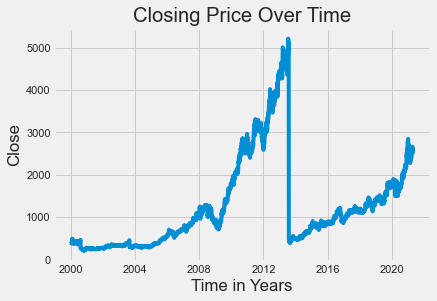

In [9]:
df_vwap = pd.DataFrame()

df_vwap['year'] = df.Date.dt.year
df_vwap['date'] = df.Date
df_vwap['close'] = df.Close
df_vwap['day of week'] = df.Date.dt.dayofweek

df_vwap.set_index('date', inplace = True)

plt.plot(df_vwap['close'])
plt.title("Closing Price Over Time")
plt.xlabel("Time in Years")
plt.ylabel("Close")

<AxesSubplot:xlabel='year'>

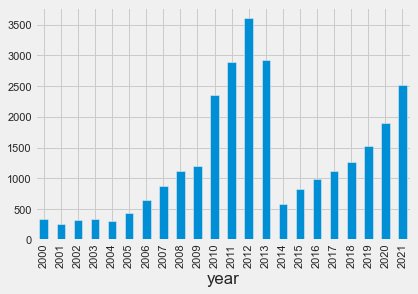

In [10]:
df_vwap.groupby('year')['close'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

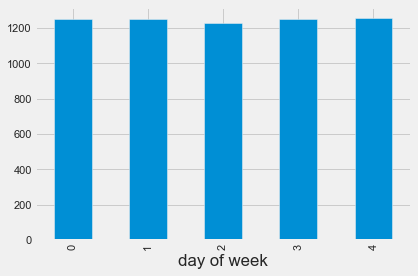

In [11]:
df_vwap.groupby('day of week')['close'].mean().plot.bar()

<AxesSubplot:xlabel='date'>

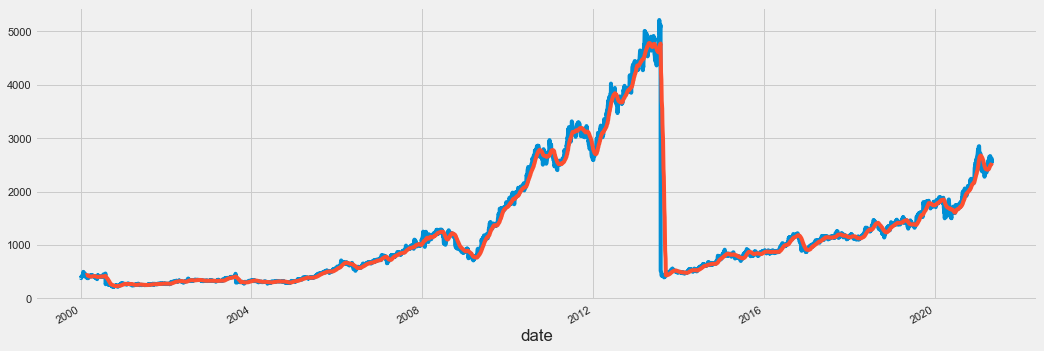

In [12]:
# Showing rolling 30 day average
df_vwap['close'].plot()
df_vwap.rolling(window=30).mean()['close'].plot(figsize=(16, 6))

In [13]:
# % of total Trades that are null
print(sum(df.Trades.isna()) / len(df.Trades))  # roughly 50% of Trades are null

# % of Deliverable Volume that is null 
print(sum(df['Deliverable Volume'].isna()) / len(df['Deliverable Volume']))

0.5372964786065885
0.09617569102612647


In [14]:
# Replacing NA values with mean
df['Deliverable Volume'].fillna((df['Deliverable Volume'].mean()), inplace=True)
df['Deliverable Volume'] = round(df['Deliverable Volume'], 2)

# Dropping Trades column as there is no sufficient way to replace NAs and we have volume and VWAP to use instead
df = df.drop(columns = "Trades")
df.set_index('Date', inplace = True)

df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.00000,5282.000000,5282.000000,5.282000e+03,5.282000e+03,5.282000e+03
mean,1246.175123,1246.836473,1263.808396,1230.037988,1246.47199,1246.570901,1246.957620,5.115442e+05,6.968686e+13,2.762906e+05
std,1073.417670,1073.021952,1086.242492,1061.604200,1073.38506,1073.451108,1074.041105,8.549548e+05,1.446606e+14,3.958507e+05
min,210.750000,210.000000,215.750000,204.000000,210.60000,210.750000,212.220000,2.500000e+01,1.278415e+09,2.500000e+01
25%,415.737500,415.000000,424.950000,410.000000,416.00000,416.262500,415.692500,1.379975e+04,7.578066e+11,1.490825e+04
50%,889.475000,891.000000,904.000000,878.325000,890.00000,889.700000,889.650000,5.739350e+04,1.130866e+13,8.838000e+04
75%,1596.937500,1598.700000,1622.612500,1569.787500,1595.75000,1597.525000,1597.707500,8.091125e+05,7.794690e+13,4.017038e+05
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.10000,5213.100000,5175.790000,1.154594e+07,2.216650e+15,7.938427e+06


In [15]:
# add a prediction column for close prices of next day
# Shift Close up one row, append current (row i+1) value to pred_c column
df['pred_c'] = df.Close.shift(-1)

# drops last row, which is missing pred_c data
df = df.dropna()
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,pred_c
Date,,,,,,,,,,,
2000-01-03,361.20,370.0,390.00,370.0,385.0,381.65,380.54,3318,1.262617e+11,276290.56,385.55
2000-01-04,381.65,380.0,392.00,375.0,390.0,385.55,383.50,4818,1.847699e+11,276290.56,383.00
2000-01-05,385.55,371.5,390.00,371.5,383.0,383.00,379.81,2628,9.981384e+10,276290.56,377.50
2000-01-06,383.00,384.9,384.90,374.5,375.1,377.50,379.88,3354,1.274114e+11,276290.56,385.70
2000-01-07,377.50,376.0,390.00,370.0,389.0,385.70,383.38,9589,3.676275e+11,276290.56,415.00
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,2511.25,2527.1,2565.00,2496.2,2520.0,2517.95,2523.48,1614593,4.074400e+14,387340.00,2557.90
2021-04-26,2517.95,2530.0,2575.00,2530.0,2558.0,2557.90,2557.47,1103980,2.823400e+14,335232.00,2574.35
2021-04-27,2557.90,2545.0,2579.90,2534.0,2571.0,2574.35,2560.55,866331,2.218288e+14,281178.00,2614.55


In [16]:
values = df.values
values = values.astype('float32')
values

array([[3.6120001e+02, 3.7000000e+02, 3.9000000e+02, ..., 1.2626172e+11,
        2.7629056e+05, 3.8554999e+02],
       [3.8164999e+02, 3.8000000e+02, 3.9200000e+02, ..., 1.8476987e+11,
        2.7629056e+05, 3.8300000e+02],
       [3.8554999e+02, 3.7150000e+02, 3.9000000e+02, ..., 9.9813843e+10,
        2.7629056e+05, 3.7750000e+02],
       ...,
       [2.5578999e+03, 2.5450000e+03, 2.5798999e+03, ..., 2.2182875e+14,
        2.8117800e+05, 2.6145500e+03],
       [2.5743501e+03, 2.5880000e+03, 2.6202500e+03, ..., 2.7767519e+14,
        4.4924100e+05, 2.6134500e+03],
       [2.6145500e+03, 2.6300000e+03, 2.6420000e+03, ..., 3.3773942e+14,
        4.4797900e+05, 2.5363999e+03]], dtype=float32)

In [17]:
scaler = MinMaxScaler(feature_range= (0,1))

scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)
scaled.columns = df.columns
scaled['Date'] = df.index
scaled.set_index('Date', inplace = True)
scaled

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,pred_c
Date,,,,,,,,,,,
2000-01-03,0.030076,0.031929,0.034628,0.033562,0.034807,0.034164,0.033911,0.000285,0.000056,0.034801,0.034944
2000-01-04,0.034164,0.033925,0.035026,0.034573,0.035805,0.034944,0.034507,0.000415,0.000083,0.034801,0.034434
2000-01-05,0.034944,0.032228,0.034628,0.033865,0.034408,0.034434,0.033764,0.000225,0.000044,0.034801,0.033334
2000-01-06,0.034434,0.034903,0.033615,0.034472,0.032831,0.033334,0.033778,0.000288,0.000057,0.034801,0.034974
2000-01-07,0.033334,0.033126,0.034628,0.033562,0.035605,0.034974,0.034483,0.000828,0.000165,0.034801,0.040831
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,0.459884,0.462394,0.466862,0.463441,0.460912,0.461223,0.465645,0.139839,0.183808,0.048790,0.469209
2021-04-26,0.461223,0.462972,0.468849,0.470274,0.468496,0.469209,0.472493,0.095614,0.127372,0.042226,0.472498
2021-04-27,0.469209,0.465966,0.469823,0.471083,0.471091,0.472498,0.473113,0.075031,0.100073,0.035417,0.480534


In [18]:
# planning out shape of data

# shape of input:
# (number_of_records x length_of_sequence x types_of_sequences)
# (5305 * 1 x 10)

# shape of output:
# (number_of_records x types_of_sequences)
# (5305 * 1)

scaled

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,pred_c
Date,,,,,,,,,,,
2000-01-03,0.030076,0.031929,0.034628,0.033562,0.034807,0.034164,0.033911,0.000285,0.000056,0.034801,0.034944
2000-01-04,0.034164,0.033925,0.035026,0.034573,0.035805,0.034944,0.034507,0.000415,0.000083,0.034801,0.034434
2000-01-05,0.034944,0.032228,0.034628,0.033865,0.034408,0.034434,0.033764,0.000225,0.000044,0.034801,0.033334
2000-01-06,0.034434,0.034903,0.033615,0.034472,0.032831,0.033334,0.033778,0.000288,0.000057,0.034801,0.034974
2000-01-07,0.033334,0.033126,0.034628,0.033562,0.035605,0.034974,0.034483,0.000828,0.000165,0.034801,0.040831
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,0.459884,0.462394,0.466862,0.463441,0.460912,0.461223,0.465645,0.139839,0.183808,0.048790,0.469209
2021-04-26,0.461223,0.462972,0.468849,0.470274,0.468496,0.469209,0.472493,0.095614,0.127372,0.042226,0.472498
2021-04-27,0.469209,0.465966,0.469823,0.471083,0.471091,0.472498,0.473113,0.075031,0.100073,0.035417,0.480534


In [19]:
# Organizing training and testing data
X = scaled.drop(columns=['pred_c']).to_numpy()
X = np.expand_dims(X, axis=2)

Y = scaled.pred_c.to_numpy() 
Y = np.expand_dims(Y, axis=1)

X.shape, Y.shape

# Split 80/20
cutoff = int(X.shape[0] * 0.8)
X_train, X_test = X[:cutoff], X[cutoff:]
Y_train, Y_test = Y[:cutoff], Y[cutoff:]
print(X.shape, Y.shape)

(5281, 10, 1) (5281, 1)


In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
def relu(x):
    return max(0.0, np.average(x))

In [22]:
def forward_pass(x, seq_len, prev_act, U, V, W, verbose=False):
    layers = []
    i = 0
    while i < seq_len:
        input = np.zeros(x.shape)    
        input[i] = x[i]              
        new_u = np.dot(U, input)
        new_w = np.dot(W, prev_act)
        add = new_w + new_u
        act = relu(add)
        new_v = np.dot(V, act)
        prev_act = act 
        layers.append({'act': act, 'prev_act': prev_act})
        i += 1
    weights = {'new_u': new_u, 'new_v': new_v, 'new_w': new_w}
    if verbose:
        return (layers, add, weights)
    else:
        return weights 

In [23]:
def get_loss(X, Y, seq_len, U, V, W):
    loss = 0.0
    for x, y in zip(X, Y):
        prev_act = np.zeros((hidden_layers, 1))   
        weights = forward_pass(x, seq_len, prev_act, U, V, W)
        loss += (y - weights['new_v'])**2 / 2
    
    return loss / float(y.shape[0])

In [24]:
def train_model(X, Y, seq_len, learning_rate, U, V, W):
    for x, y in zip(X, Y):
        d_U = d_U_t = np.zeros(U.shape)
        d_V = d_V_t = np.zeros(V.shape)
        d_W = d_W_t = np.zeros(W.shape)
        
        # Forward pass
        prev_act = np.zeros((hidden_layers, 1))
        layers, add, weights = forward_pass(x, seq_len, prev_act, U, V, W, verbose=True)
        d_new_v = (weights['new_v'] - y)
        
        # Backward pass
        i = 0
        while i < seq_len:
            d_act = d_base = np.dot(np.transpose(V), d_new_v)
            d_add = add * (1 - add) * d_act

            d_new_w = d_add * np.ones_like(weights['new_w'])
            d_prev_act = np.dot(np.transpose(W), d_new_w)

            d_V_t = np.dot(d_new_v, np.transpose(layers[i]['act']))

            for _ in range(i-1, -1, -1):
                d_act = d_base + d_prev_act
                d_add = add * (1 - add) * d_act

                d_new_w = np.ones_like(weights['new_w']) * d_add  
                d_new_u = np.ones_like(weights['new_u']) * d_add 
                d_prev_act = np.dot(np.transpose(W), d_new_w)

                input = np.zeros(x.shape)
                input[i] = x[i]

                d_U_t += np.dot(U, input) 
                d_W_t += np.dot(W, layers[i]['prev_act'])

            # Update weights
            d_V += d_V_t
            d_U += d_U_t
            d_W += d_W_t

            # Limit weights
            for d in [d_U, d_V, d_W]:
                if d.max() > max_d:
                    d[d > max_d] = max_d
                if d.min() < min_d:
                    d[d < min_d] = min_d

            i += 1

        U -= learning_rate * d_U
        V -= learning_rate * d_V
        W -= learning_rate * d_W

    return (U, V, W)


In [25]:
def predict(X, Y, seq_len, weights, hidden_layers):
    U, V, W = weights 
    pred = []
    for x, y in zip(X, Y):
        prev_act = np.zeros((hidden_layers, 1))
        i = 0
        while i < seq_len:
            new_u = np.dot(U, x)
            new_w = np.dot(W, prev_act)
            add = new_w + new_u
            act = relu(add)
            new_v = np.dot(V, act)
            prev_act = act
            i += 1
        pred.append(new_v)
    return np.array(pred)

In [26]:
def accuracy(actual, predicted):
    i = 0
    correct = 0
    while i < len(actual):
        if abs(actual[i] - predicted[i]) < 0.01:
            correct += 1
        i += 1
    return correct / float(len(actual)) * 100.0

In [27]:
 # hyperparameters to tune: epochs, learning rate, hidden_layersrs
t_epochs = [5, 7, 15]
t_learning_rates = [0.0001, .001, .01]
t_hidden_layers = [1, 2]


min_d = -10
max_d = 10
output_dim = 1
seq_len = 10                   

In [28]:
e_list = []
l_list = []
h_list = []
train_rmse_list = []
test_rmse_list = []
train_acc_list = []
test_acc_list = []

Epoch:  1 | Loss: 192.54369902476316 | Val Loss: 38.609163512643775
Epoch:  2 | Loss: 193.56018604844573 | Val Loss: 40.6794004634234
Epoch:  3 | Loss: 193.53955112210215 | Val Loss: 40.63848129975412
Epoch:  4 | Loss: 193.51894377909264 | Val Loss: 40.59759710992265
Epoch:  5 | Loss: 193.49836401394708 | Val Loss: 40.55674788711811


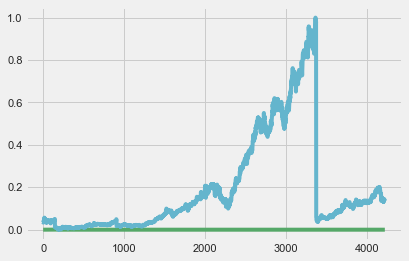

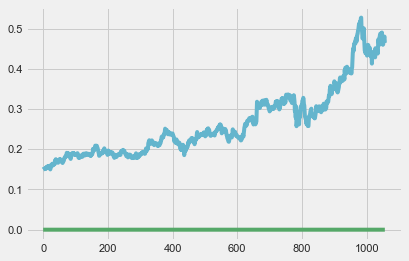

Epochs:  5
Learning Rate:  0.0001
Hidden Layers:  1
Training RMSE: 0.30288835879829634
Testing RMSE 0.27876688940118843
Training accuracy: 4.36%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 188.2725229987869 | Val Loss: 37.32438958372432
Epoch:  2 | Loss: 193.54387308258177 | Val Loss: 40.64705338094673
Epoch:  3 | Loss: 193.4878318819903 | Val Loss: 40.535834771630284
Epoch:  4 | Loss: 193.43199594361207 | Val Loss: 40.424877131993576
Epoch:  5 | Loss: 193.37636516211757 | Val Loss: 40.314180364755224


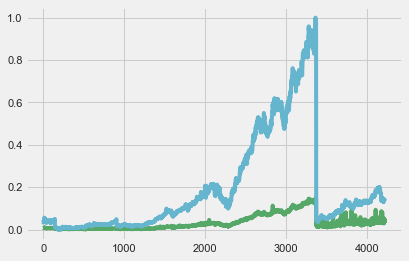

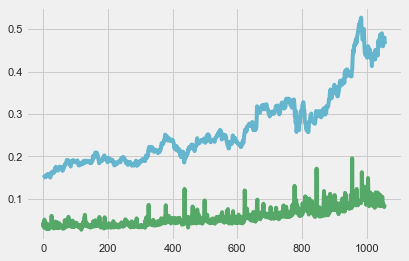

Epochs:  5
Learning Rate:  0.0001
Hidden Layers:  2
Training RMSE: 0.256331347563581
Testing RMSE 0.2192845049390568
Training accuracy: 8.57%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 193.6257439520283 | Val Loss: 40.86783423593715
Epoch:  2 | Loss: 193.4864791386808 | Val Loss: 40.53314832197001
Epoch:  3 | Loss: 193.2353006945328 | Val Loss: 40.03281614371622
Epoch:  4 | Loss: 192.9883406613822 | Val Loss: 39.537863361957314
Epoch:  5 | Loss: 192.74558679694877 | Val Loss: 39.04827473077334


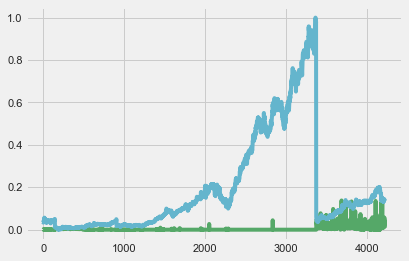

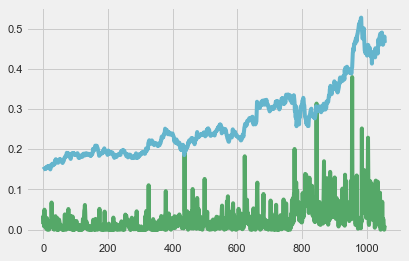

Epochs:  5
Learning Rate:  0.001
Hidden Layers:  1
Training RMSE: 0.30160205364742027
Testing RMSE 0.2518891147161515
Training accuracy: 8.07%
Testing accuracy: 0.09%
Epoch:  1 | Loss: 176.11445481905074 | Val Loss: 26.40916519716967
Epoch:  2 | Loss: 191.2358275702933 | Val Loss: 35.92457207878468
Epoch:  3 | Loss: 190.7140294663627 | Val Loss: 34.80727295216978
Epoch:  4 | Loss: 190.2178736422745 | Val Loss: 33.722613090067284
Epoch:  5 | Loss: 189.7471859423297 | Val Loss: 32.67037577116413


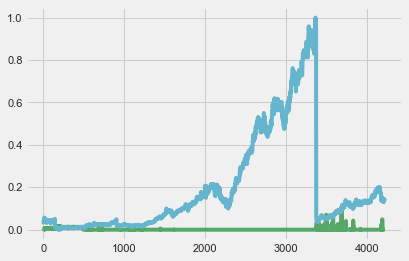

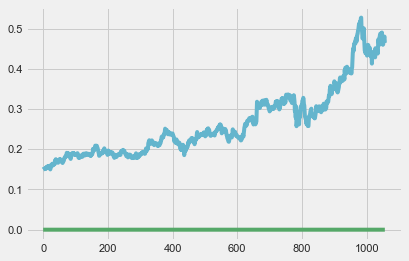

Epochs:  5
Learning Rate:  0.001
Hidden Layers:  2
Training RMSE: 0.30277004150616
Testing RMSE 0.27876688940118843
Training accuracy: 7.86%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 191.39793906006378 | Val Loss: 37.378688974105636
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905


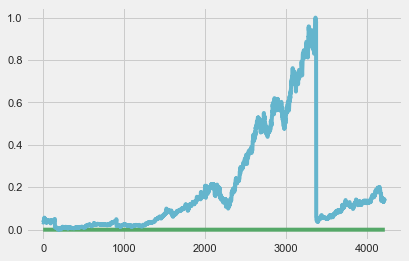

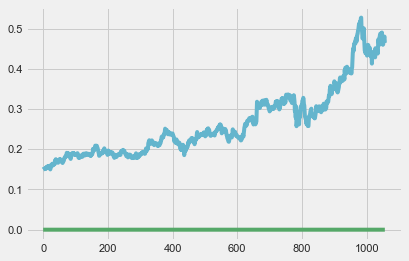

Epochs:  5
Learning Rate:  0.01
Hidden Layers:  1
Training RMSE: 0.30288838715226346
Testing RMSE 0.27876688940118843
Training accuracy: 4.36%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 190.26108530505735 | Val Loss: 35.972648147194974
Epoch:  2 | Loss: 189.1428839131066 | Val Loss: 31.27990528751784
Epoch:  3 | Loss: 186.57995745686856 | Val Loss: 24.467725890853714
Epoch:  4 | Loss: 185.47531174866387 | Val Loss: 19.513092266467115
Epoch:  5 | Loss: 185.75372527819678 | Val Loss: 16.322381165571766


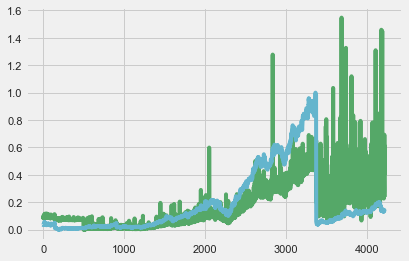

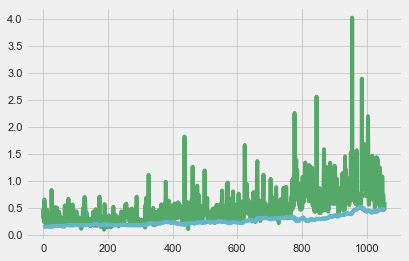

Epochs:  5
Learning Rate:  0.01
Hidden Layers:  2
Training RMSE: 0.18267055902902674
Testing RMSE 0.3713802596040818
Training accuracy: 8.69%
Testing accuracy: 3.5%
Epoch:  1 | Loss: 186.9313527613677 | Val Loss: 32.13997748431422
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905


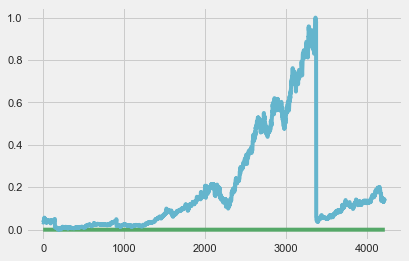

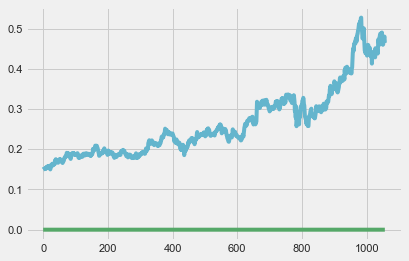

Epochs:  7
Learning Rate:  0.0001
Hidden Layers:  1
Training RMSE: 0.30288838715226346
Testing RMSE 0.27876688940118843
Training accuracy: 4.36%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 190.24804587022444 | Val Loss: 36.708855034005445
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905


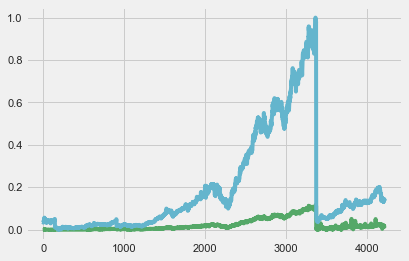

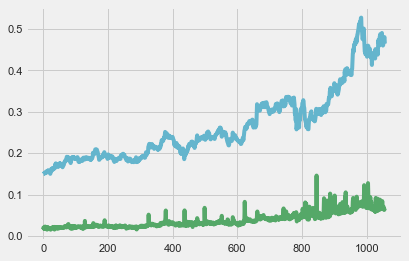

Epochs:  7
Learning Rate:  0.0001
Hidden Layers:  2
Training RMSE: 0.26834640972199225
Testing RMSE 0.23743004887969632
Training accuracy: 4.45%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 189.24325171546303 | Val Loss: 32.08676069732584
Epoch:  2 | Loss: 193.50867460087946 | Val Loss: 40.577216066395366
Epoch:  3 | Loss: 193.4122291671965 | Val Loss: 40.38556112674176
Epoch:  4 | Loss: 193.31639256633778 | Val Loss: 40.19467812852752
Epoch:  5 | Loss: 193.22116423306784 | Val Loss: 40.00456636932503
Epoch:  6 | Loss: 193.1265436025722 | Val Loss: 39.81522514722288
Epoch:  7 | Loss: 193.03253011045263 | Val Loss: 39.62665376082586


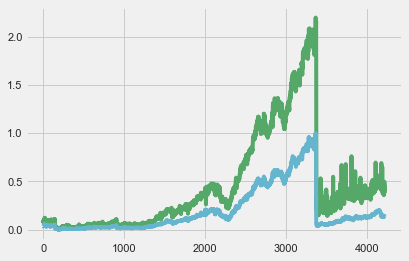

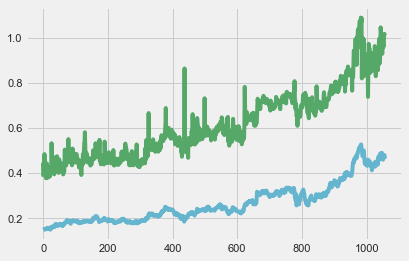

Epochs:  7
Learning Rate:  0.001
Hidden Layers:  1
Training RMSE: 0.37437164126999495
Testing RMSE 0.3599309261508012
Training accuracy: 0.88%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 190.57508223306533 | Val Loss: 35.75605252359838
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905


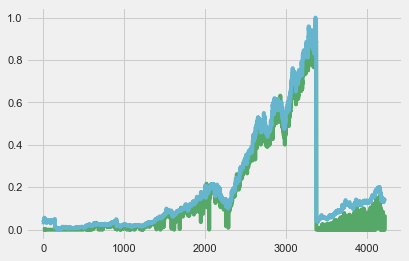

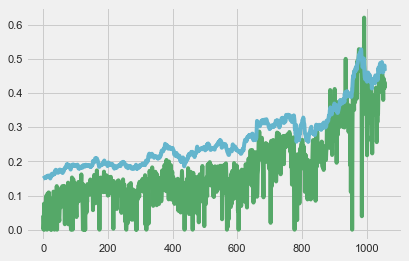

Epochs:  7
Learning Rate:  0.001
Hidden Layers:  2
Training RMSE: 0.0536048130102017
Testing RMSE 0.09976108265761367
Training accuracy: 28.05%
Testing accuracy: 1.7%
Epoch:  1 | Loss: 60.77103287347201 | Val Loss: 3.883698111278577
Epoch:  2 | Loss: 185.4322246080484 | Val Loss: 17.889659782137734
Epoch:  3 | Loss: 189.9178479188889 | Val Loss: 14.81794857459736
Epoch:  4 | Loss: 200.50382132687045 | Val Loss: 20.257044641026447
Epoch:  5 | Loss: 214.69443859827211 | Val Loss: 31.142049875687754
Epoch:  6 | Loss: 230.06379792413372 | Val Loss: 44.57536157457706
Epoch:  7 | Loss: 247.56198450292294 | Val Loss: 60.925019684317434


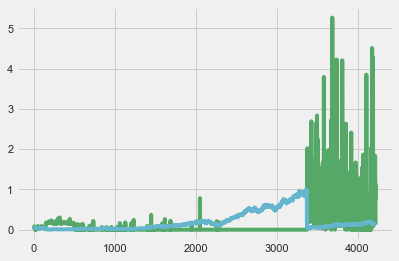

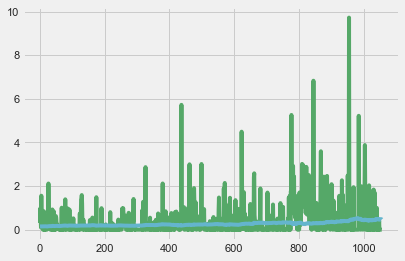

Epochs:  7
Learning Rate:  0.01
Hidden Layers:  1
Training RMSE: 0.4822460595111951
Testing RMSE 0.73828762462882
Training accuracy: 2.23%
Testing accuracy: 0.95%
Epoch:  1 | Loss: 176.21330903085396 | Val Loss: 27.475542911463204
Epoch:  2 | Loss: 186.09038694583978 | Val Loss: 22.757834523408967
Epoch:  3 | Loss: 186.10163942584484 | Val Loss: 15.687972247048473
Epoch:  4 | Loss: 191.2963153785036 | Val Loss: 15.209523488110221
Epoch:  5 | Loss: 201.19937856638518 | Val Loss: 20.731705194255486
Epoch:  6 | Loss: 215.36960233944052 | Val Loss: 31.70550990528777
Epoch:  7 | Loss: 233.39736237856798 | Val Loss: 47.620985605662135


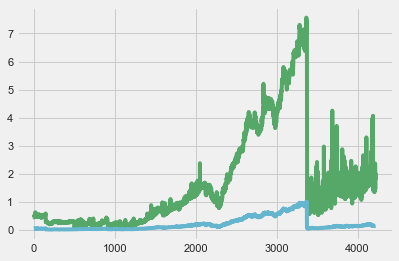

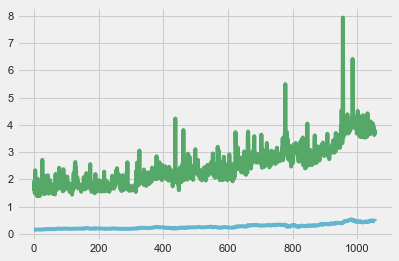

Epochs:  7
Learning Rate:  0.01
Hidden Layers:  2
Training RMSE: 2.0771719493416922
Testing RMSE 2.3038128440281493
Training accuracy: 0.0%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 192.84105962021135 | Val Loss: 39.1945418714319
Epoch:  2 | Loss: 193.6361544728517 | Val Loss: 40.82987713778116
Epoch:  3 | Loss: 193.60053517481657 | Val Loss: 40.75935616523535
Epoch:  4 | Loss: 193.56499697182036 | Val Loss: 40.68893771589335
Epoch:  5 | Loss: 193.5295398389841 | Val Loss: 40.61862175886974
Epoch:  6 | Loss: 193.49416375143315 | Val Loss: 40.54840826328643
Epoch:  7 | Loss: 193.4588686843009 | Val Loss: 40.47829719827306
Epoch:  8 | Loss: 193.42365461272735 | Val Loss: 40.40828853296651
Epoch:  9 | Loss: 193.38852151185577 | Val Loss: 40.33838223651124
Epoch:  10 | Loss: 193.35346935683955 | Val Loss: 40.26857827805932
Epoch:  11 | Loss: 193.31849812283423 | Val Loss: 40.198876626770165
Epoch:  12 | Loss: 193.2836077850031 | Val Loss: 40.12927725181068
Epoch:  13 | Loss: 193.24879831851

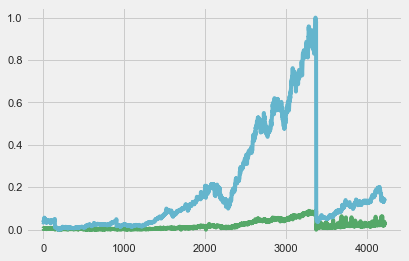

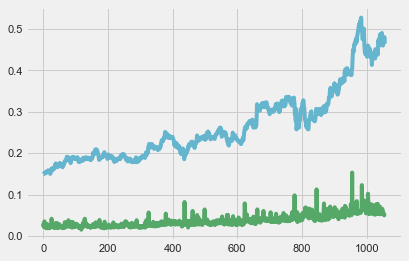

Epochs:  15
Learning Rate:  0.0001
Hidden Layers:  1
Training RMSE: 0.2750788923518528
Testing RMSE 0.2398930796006765
Training accuracy: 8.05%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 176.21455121726558 | Val Loss: 31.822510170278353
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  8 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  9 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  10 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  11 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  12 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  13 | L

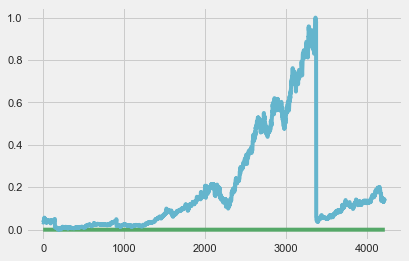

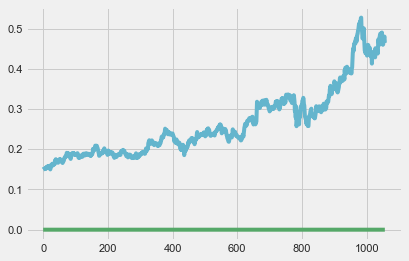

Epochs:  15
Learning Rate:  0.0001
Hidden Layers:  2
Training RMSE: 0.30288838715226346
Testing RMSE 0.27876688940118843
Training accuracy: 4.36%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 185.4459662349361 | Val Loss: 34.80594312950606
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  8 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  9 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  10 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  11 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  12 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  13 | L

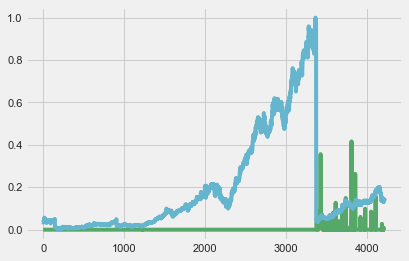

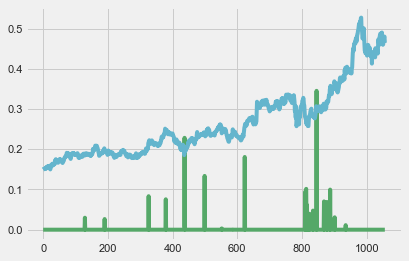

Epochs:  15
Learning Rate:  0.001
Hidden Layers:  1
Training RMSE: 0.30275200384517853
Testing RMSE 0.27759503050180345
Training accuracy: 4.71%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 134.56896344080923 | Val Loss: 17.570421409707084
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  8 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  9 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  10 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  11 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  12 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  13 | 

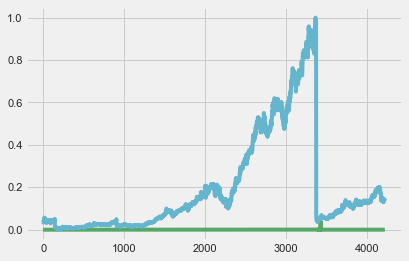

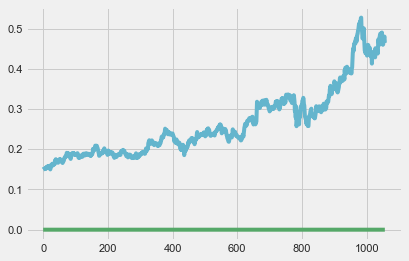

Epochs:  15
Learning Rate:  0.001
Hidden Layers:  2
Training RMSE: 0.30288589842511127
Testing RMSE 0.27876688940118843
Training accuracy: 4.36%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 183.39010325489716 | Val Loss: 37.22104855917415
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  8 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  9 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  10 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  11 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  12 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  13 | L

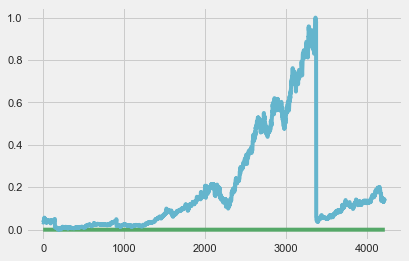

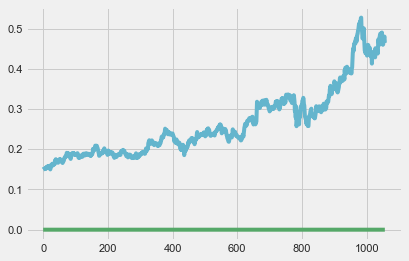

Epochs:  15
Learning Rate:  0.01
Hidden Layers:  1
Training RMSE: 0.30288838715226346
Testing RMSE 0.27876688940118843
Training accuracy: 4.36%
Testing accuracy: 0.0%
Epoch:  1 | Loss: 176.5962896193077 | Val Loss: 26.13860314294957
Epoch:  2 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  3 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  4 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  5 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  6 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  7 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  8 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  9 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  10 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  11 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  12 | Loss: 193.75778415142915 | Val Loss: 41.070252204059905
Epoch:  13 | Los

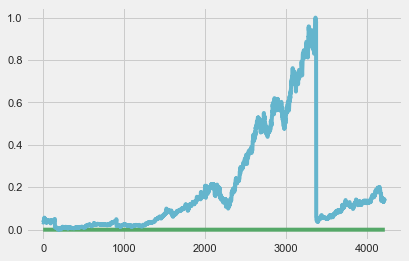

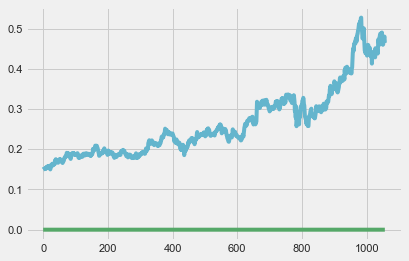

Epochs:  15
Learning Rate:  0.01
Hidden Layers:  2
Training RMSE: 0.30288838715226346
Testing RMSE 0.27876688940118843
Training accuracy: 4.36%
Testing accuracy: 0.0%
time: 798.1678123 s


In [29]:
import timeit
from sklearn.metrics import mean_squared_error
import math

start = timeit.default_timer()
final_output = pd.DataFrame()
output = pd.DataFrame()

for epochs in t_epochs:
    for learning_rate in t_learning_rates:
        for hidden_layers in t_hidden_layers:
            # train
            U = np.random.uniform(0, 1, (hidden_layers, seq_len))
            W = np.random.uniform(0, 1, (hidden_layers, hidden_layers))
            V = np.random.uniform(0, 1, (output_dim, hidden_layers))

            for epoch in range(epochs):
                # check loss on train
                loss = get_loss(X_train, Y_train, seq_len, U, V, W)
                val_loss = get_loss(X_test, Y_test, seq_len, U, V, W)
            
                print('Epoch: ', epoch + 1, '| Loss:', loss[0][0], '| Val Loss:', val_loss[0][0])
            
                U, V, W = train_model(X_train, Y_train, seq_len, learning_rate, U, V, W)
            
            # get predictions
            train_pred = predict(X_train, Y_train, seq_len, (U, V, W), hidden_layers)
            test_pred = predict(X_test, Y_test, seq_len, (U, V, W), hidden_layers)
            
            # plot predictions vs actual
            plt.plot(train_pred[:, 0, 0], 'g')
            plt.plot(Y_train[:, 0], 'c')
            plt.show()
            
            plt.plot(test_pred[:, 0, 0], 'g')
            plt.plot(Y_test[:, 0], 'c')
            plt.show()
            
            # get RMSE
            train_rmse = math.sqrt(mean_squared_error(Y_train[:, 0], train_pred[:, 0, 0]))
            test_rmse = math.sqrt(mean_squared_error(Y_test[:, 0], test_pred[:, 0, 0]))
            
            print('Epochs: ', epochs)
            print('Learning Rate: ', learning_rate)
            print('Hidden Layers: ', hidden_layers)
            print('Training RMSE:', train_rmse)
            print('Testing RMSE', test_rmse)
            
            # get accuracy
            train_accuracy = round(accuracy(Y_train[:, 0], train_pred[:, 0, 0]), 2)
            test_accuracy = round(accuracy(Y_test[:, 0], test_pred[:, 0, 0]), 2)

            print(f'Training accuracy: {train_accuracy}%')
            print(f'Testing accuracy: {test_accuracy}%')

            # output to dataframe
            
            e_list.append(epochs)
            l_list.append(learning_rate)
            h_list.append(hidden_layers)
            train_rmse_list.append(train_rmse)
            test_rmse_list.append(test_rmse)
            train_acc_list.append(train_accuracy)
            test_acc_list.append(test_accuracy)
            
            
end = timeit.default_timer()

print(f'time: {end-start} s')

d = {'Epochs' : e_list, 'Learning Rate' : l_list, 'Hidden Layers' : h_list, 'Train RMSE' : train_rmse_list,
    'Test RMSE' : test_rmse_list, 'Training Accuracy' : train_acc_list, 'Test Accuracy' : test_acc_list}
deedfR = pd.DataFrame(d)



In [30]:
deedfR

,Epochs,Learning Rate,Hidden Layers,Train RMSE,Test RMSE,Training Accuracy,Test Accuracy
0,5,0.0001,1,0.302888,0.278767,4.36,0.00
1,5,0.0001,2,0.256331,0.219285,8.57,0.00
2,5,0.0010,1,0.301602,0.251889,8.07,0.09
3,5,0.0010,2,0.302770,0.278767,7.86,0.00
4,5,0.0100,1,0.302888,0.278767,4.36,0.00
5,5,0.0100,2,0.182671,0.371380,8.69,3.50
6,7,0.0001,1,0.302888,0.278767,4.36,0.00
7,7,0.0001,2,0.268346,0.237430,4.45,0.00
8,7,0.0010,1,0.374372,0.359931,0.88,0.00
9,7,0.0010,2,0.053605,0.099761,28.05,1.70
